In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


# This uses a hacked version of Bmad, replacing the space charge method

Activate via:
```
! Uses hacked Bmad to do 3D CSR in place of space charge
set ele sbend::* space_charge_method = fft_3D

set csr_param ds_track_step = 2
set bmad_com space_charge_mesh_size   = 64 64 512
```


In [2]:
import scipy.constants
mec2 = scipy.constants.value('electron mass energy equivalent in MeV')*1e6
c_light = scipy.constants.c
e_charge = scipy.constants.e
r_e = scipy.constants.value('classical electron radius')



In [3]:
#sigma_z = 40e-6
#sigma_x = 134e-6 
#rho = 1538.
#gamma = 58708.


Q = 2e-9
energy = 3.0000000E+10
sigma_z = 8.99379459E-04
sigma_x = 2.36223562E-05
rho = 10.34
gamma = energy / mec2



beta = np.sqrt(1 - 1 / gamma ** 2)
p0c = gamma*mec2

Nb = Q/e_charge

# Characteristic wake in eV/m from Chris's paper
W0 = Nb* r_e * mec2 *(sigma_z/abs(rho))**(2/3) / sigma_z**2

kick_factor = r_e * Nb / gamma 

print(f"""
Q       : {Q} C
sigma_x : {sigma_x} m
sigma_z : {sigma_z} m
rho     : {rho} m
gamma   : {gamma}
W0      : {W0:.3e} eV/m
""")


Q       : 2e-09 C
sigma_x : 2.36223562e-05 m
sigma_z : 0.000899379459 m
rho     : 10.34 m
gamma   : 58708.53550677551
W0      : 4.362e+04 eV/m



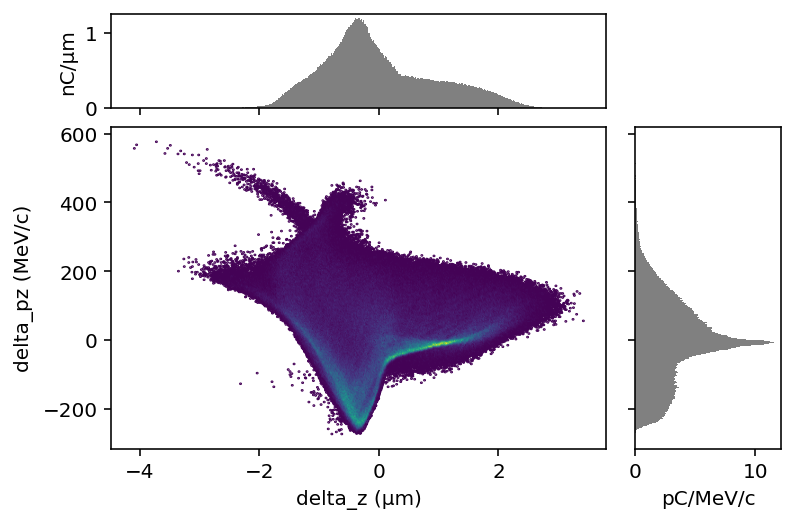

In [4]:
from pmd_beamphysics import ParticleGroup, particle_paths

P1 = ParticleGroup('END_csr1d.h5')
P1.drift_to_t()
P1.plot('delta_z', 'delta_pz')

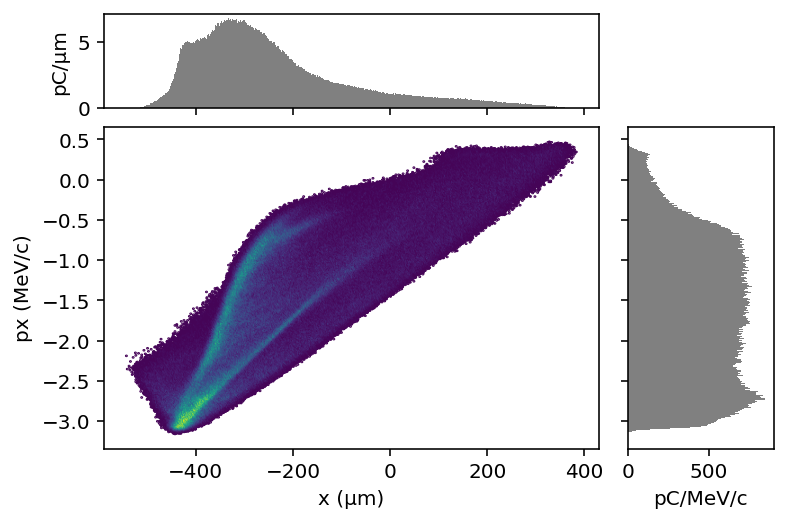

In [5]:
P1.plot('x', 'px')

In [6]:
P1['delta_energy'].ptp() / W0

19439.257609956414

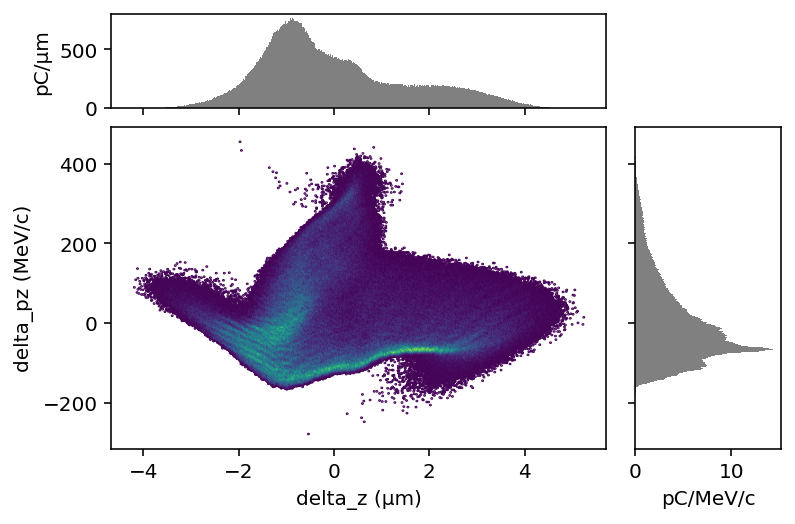

In [7]:
# Bmad 3D CSR
P3 = ParticleGroup('END_csr3d.h5')
P3.drift_to_t()
P3.plot('delta_z', 'delta_pz')

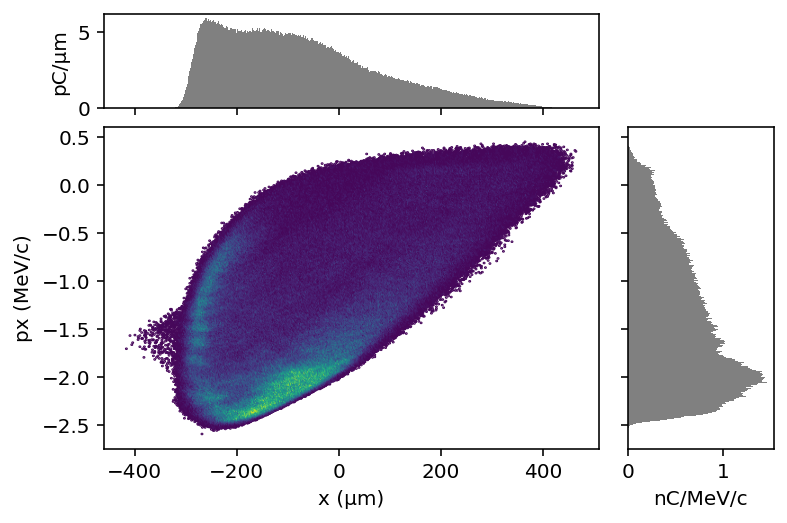

In [8]:
P3.plot('x', 'px')

In [9]:
P3['norm_emit_x']*1e6, P3['sigma_p']/p0c

(169.35368649732976, 0.0033618325632222266)

In [10]:
# Ws part only
#P4 = ParticleGroup('END_csr3d.h5')
#P4.drift_to_t()
#P4.plot('delta_z', 'delta_pz')

In [11]:
P3['delta_p'].max()/P1['delta_p'].max()

0.7894126225460771

In [12]:
P3['delta_energy'].ptp() / W0 

16803.06355826861

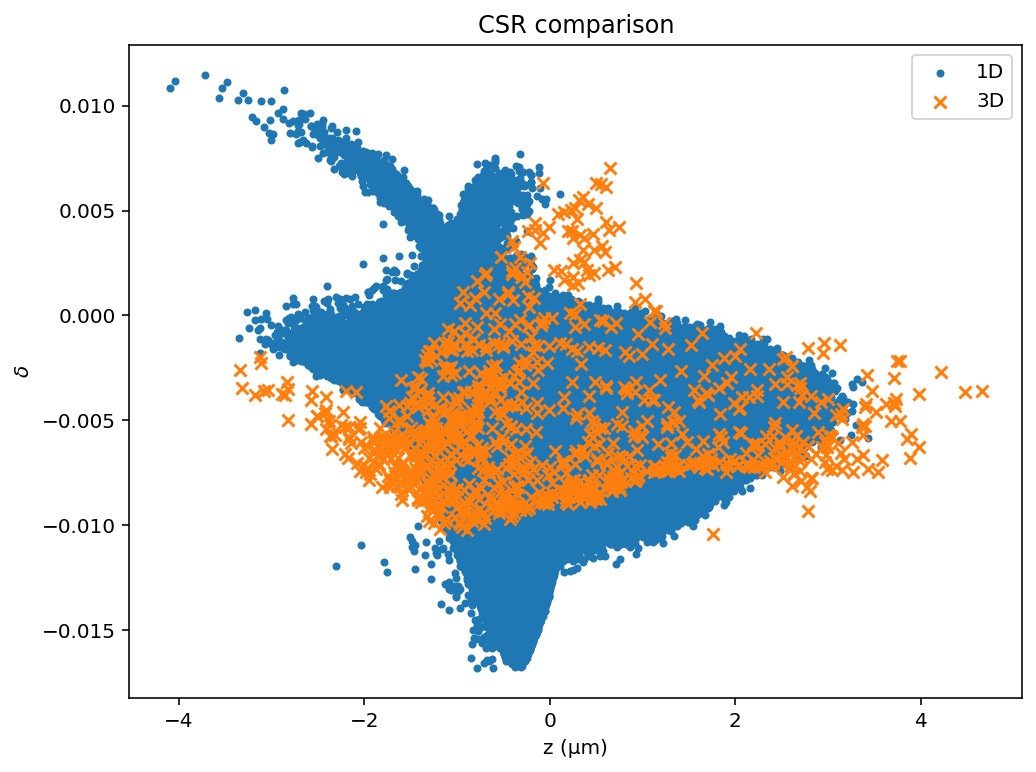

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
skip = 1000
ax.scatter(P1.z*1e6, P1.p/p0c -1, label='1D', marker='.')
ax.scatter(P3.z[::skip]*1e6, (P3.p[::skip]/p0c -1), label='3D', marker='x')
#ax.scatter(P4.z[::skip]*1e6, (P4.p[::skip]/p0c -1), label='3D test', marker='.')


ax.set_title('CSR comparison')
ax.set_xlabel('z (µm)')
ax.set_ylabel(r'$\delta$')
ax.legend()